# Ques 1
Two Real-World Examples of Time Series and Their Applications:
1.	Electricity Consumption Data


*   Hourly electricity usage in a city.
*   Used by power companies to forecast demand and optimize energy production.

2. Website Traffic


*   Daily number of visitors to an e-commerce website.
*   Used by power companies to forecast demand and optimize energy production.


## Four Main Components of a Time Series


1.   Trend


*   Increasing number of mobile phone users over the years.


2.   Seasonality


*   Regular, repeating patterns based on seasons or calendar events.

3. Cyclic Pattern



*   Long-term waves or cycles not tied to the calendar but influenced by economic conditions.

4. Residual Component



*   Unpredictable variations or noise left after removing trend, seasonality, and cyclic components.









In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# **Ques 2**

In [2]:
# Monthly sales data (in thousands)
sales = [20,24,22,26,25,28,30,27,29,31]

In [3]:
# setting date range
dates = pd.date_range(start='2025-01-01',periods = len(sales),freq='M')
time_series = pd.Series(sales,index=dates)

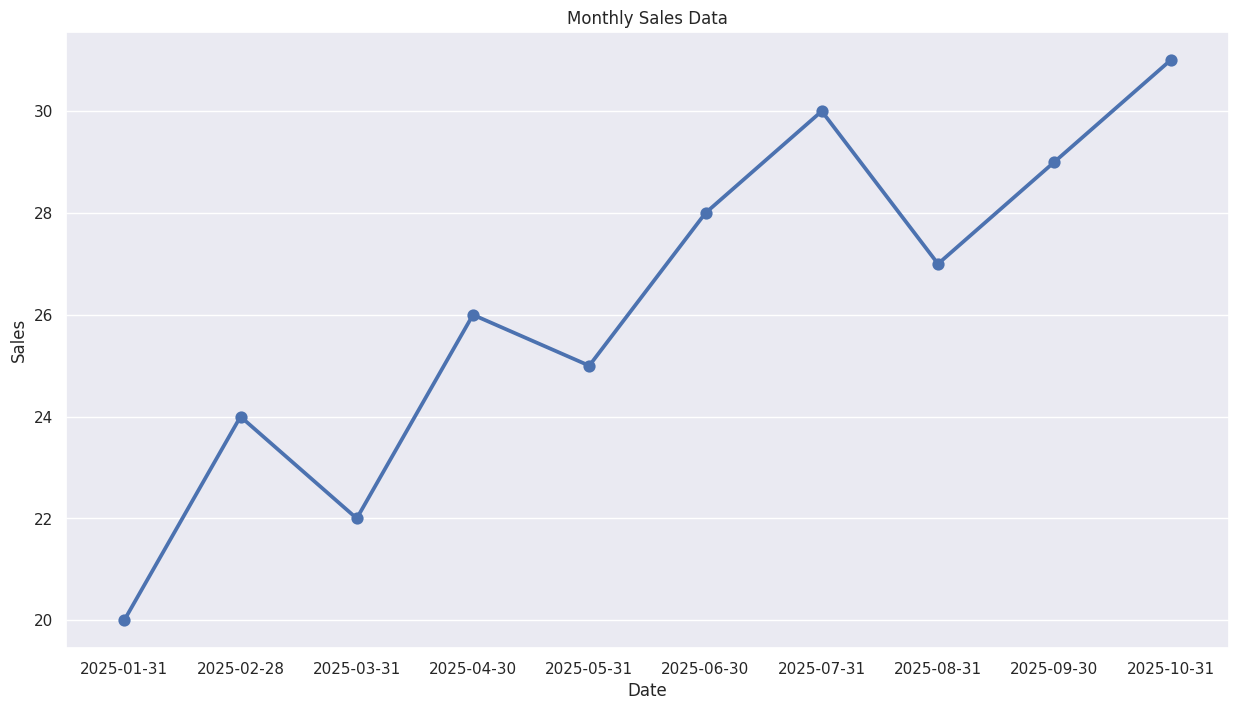

In [4]:
plt.figure(figsize=(15,8))
sns.set()
sns.pointplot(x=time_series.index,y=time_series.values)
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

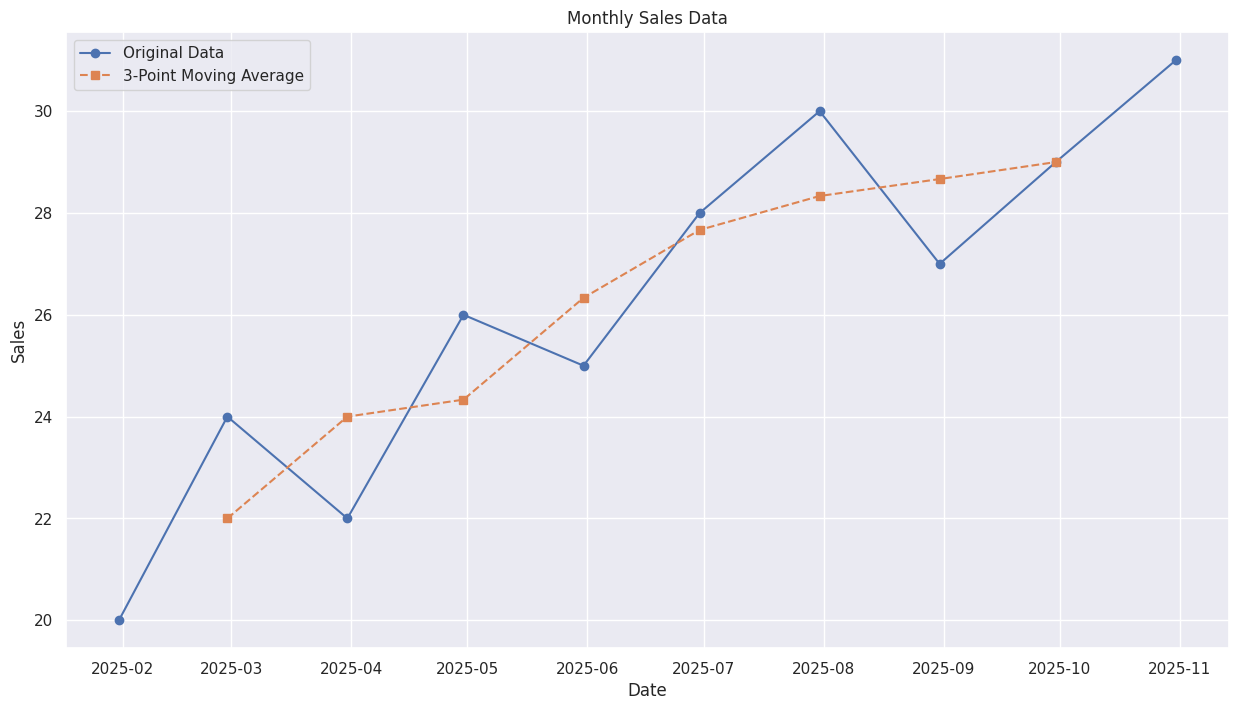

In [5]:
# 3-point moving average
ma = time_series.rolling(window=3,center=True).mean()

# plotting both moving average and original data
plt.figure(figsize=(15,8))
plt.plot(time_series,label='Original Data', marker='o')
plt.plot(ma,label='3-Point Moving Average',marker='s',linestyle='--')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Comment on how the moving average helps in trend estimation:


1.   Noise Reduction:
      By averaging each value with its immediate neighbors, short‑lived up‑and‑down fluctuations (e.g., isolated spikes or dips) are smoothed away. This “filters out” random month‑to‑month volatility, making the persistent directional movement (the trend) more visible.
2.   Clarifying the Underlying Direction:
      In a noisy series, it’s often hard to tell whether sales are genuinely climbing or if apparent increases are just random blips. The moving average produces a cleaner curve that more faithfully mirrors the true ascent (or descent) of the data.

# **Ques 3**

## Lag Operator:

### In time‐series analysis, the lag operator, usually denoted L, simply shifts a series back by one period (or more, if you wish).

Lagged Series:
2025-01-31     NaN
2025-02-28    20.0
2025-03-31    24.0
2025-04-30    22.0
2025-05-31    26.0
2025-06-30    25.0
2025-07-31    28.0
2025-08-31    30.0
2025-09-30    27.0
2025-10-31    29.0
Freq: ME, dtype: float64


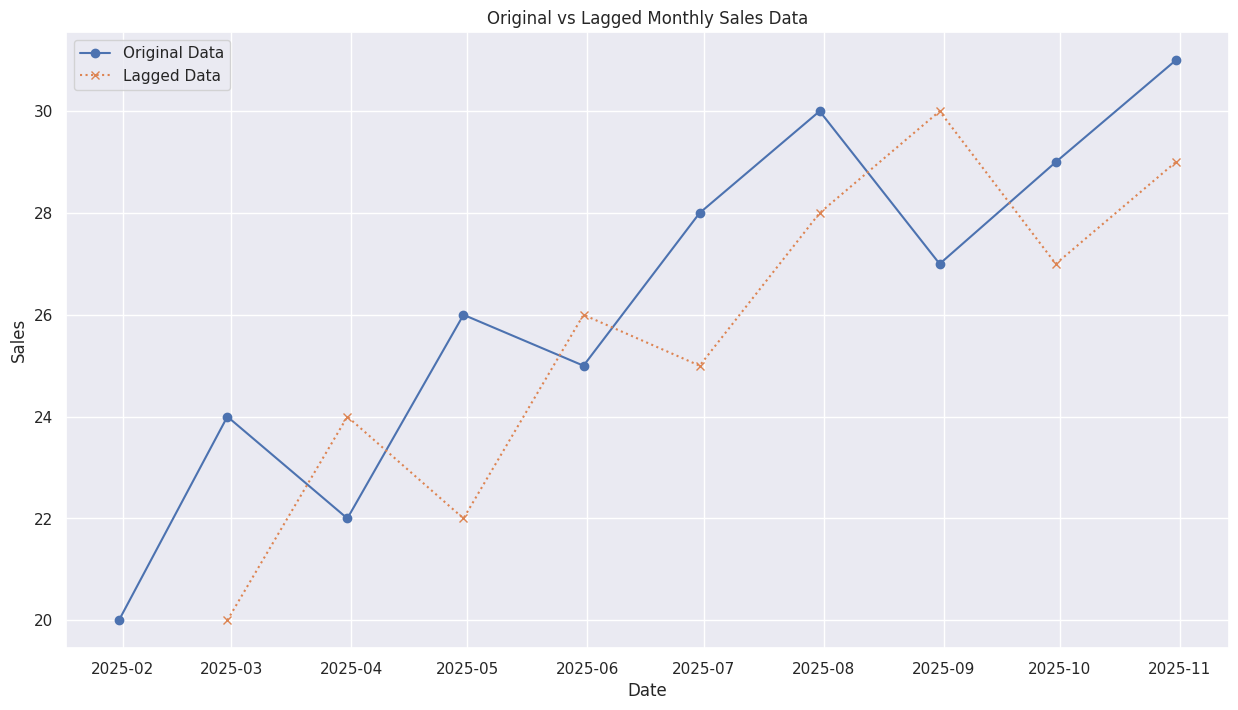

In [6]:
# apply the lag operator to the time series
lagged_series = time_series.shift(1)

# print the lagged series
print("Lagged Series:")
print(lagged_series)

# plotting original and lagged series
plt.figure(figsize=(15,8))
plt.plot(time_series, label='Original Data', marker='o')
plt.plot(lagged_series, label='Lagged Data', marker='x', linestyle=':')
plt.title('Original vs Lagged Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Autocorrelation for Lag 1: 0.4244
Autocorrelation for Lag 2: 0.3810


<Figure size 1000x600 with 0 Axes>

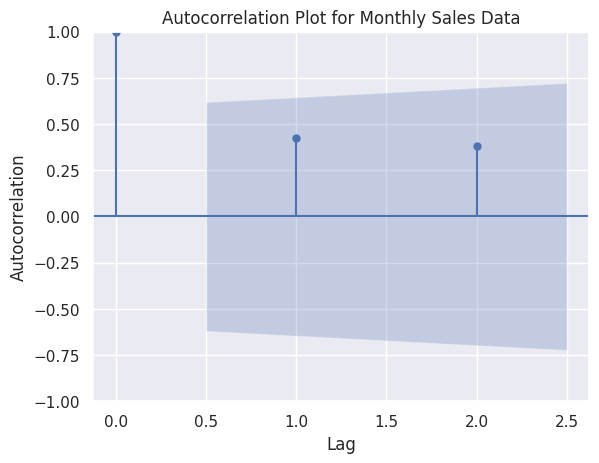


Interpretation:
The autocorrelation for Lag 1 (0.4244) is positive and relatively high.
This indicates a strong positive linear relationship between the sales in the current month and the sales in the previous month.
Essentially, if sales were high last month, they are likely to be high this month as well, and vice-versa.

The autocorrelation for Lag 2 ({autocorr_lag2:.4f}) is also positive, but slightly lower than for Lag 1.
This suggests a positive linear relationship between the sales in the current month and the sales two months ago, but the relationship is not as strong as with the immediately preceding month.
Overall, these positive autocorrelations at lags 1 and 2 suggest that the sales data exhibits a trend or persistence, where values are correlated with their recent past values.
This is consistent with the visual inspection of the data, which shows a general upward trend.


In [7]:
from statsmodels.tsa.stattools import acf

# Calculate autocorrelation for lag 1
autocorr_lag1 = acf(time_series, nlags=1)[1]
print(f"Autocorrelation for Lag 1: {autocorr_lag1:.4f}")

# Calculate autocorrelation for lag 2
autocorr_lag2 = acf(time_series, nlags=2)[2]
print(f"Autocorrelation for Lag 2: {autocorr_lag2:.4f}")

# Plot autocorrelation function
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=2)
plt.title('Autocorrelation Plot for Monthly Sales Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Interpretation
print("\nInterpretation:")
print(f"The autocorrelation for Lag 1 ({autocorr_lag1:.4f}) is positive and relatively high.")
print("This indicates a strong positive linear relationship between the sales in the current month and the sales in the previous month.")
print("Essentially, if sales were high last month, they are likely to be high this month as well, and vice-versa.")
print("\nThe autocorrelation for Lag 2 ({autocorr_lag2:.4f}) is also positive, but slightly lower than for Lag 1.")
print("This suggests a positive linear relationship between the sales in the current month and the sales two months ago, but the relationship is not as strong as with the immediately preceding month.")
print("Overall, these positive autocorrelations at lags 1 and 2 suggest that the sales data exhibits a trend or persistence, where values are correlated with their recent past values.")
print("This is consistent with the visual inspection of the data, which shows a general upward trend.")